### 머신러닝 맛보기

In [1]:
### exe) 생선 분류하기 : 도미와 빙어 분류하기 (도미 찾기)
# - 생선을 자동으로 찾아주는 머신러닝 만들기

### 생선을 분류하기 위해 필요한 특징이 될 데이터 확인하기
# - 특징을 알면 쉽게 분류할 수 있습니다.
# - 생선은 무게와 길이 데이터를 최초에 수집해 놓고 있습니다.

In [1]:
### 데이터 가지고 오기
# - 도미 데이터

# - 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]

# - 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
print("bream_length =", bream_length)
print('----------------------------------')
print("bream_weight =", bream_weight)
print('----------------------------------')
print(len(bream_length), len(bream_weight))

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
----------------------------------
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
----------------------------------
35 35


Text(0, 0.5, 'weigth')

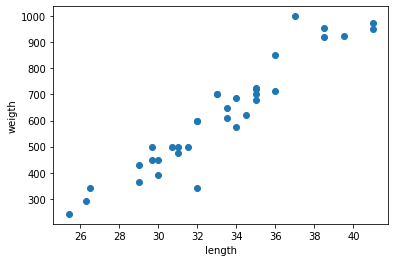

In [2]:
### 데이터의 특징간의 분포 확인하기
# - 선형관계? 비선형관계?
import matplotlib.pyplot as plt

# 산점도로 표현하기 (scatter(x, y))
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weigth')

Text(0, 0.5, 'weigth')

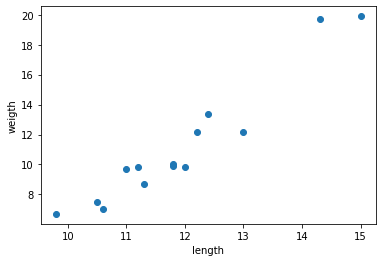

In [3]:
# - 빙어 데이터

# - 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# - 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 산점도로 표현하기 (scatter(x, y))
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weigth')

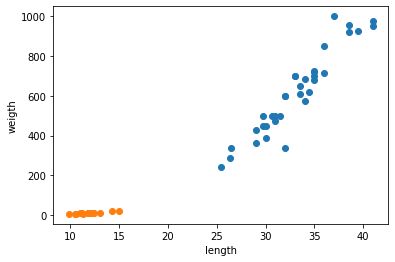

In [4]:
# - 도미, 빙어 같이 산점도 표현
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

###(해석)
# 파랑색 : 도미 / 주황색 : 빙어
# 도미와 빙어는 길이에 비례해서 무게가 증가하는 것으로 보임
# 다만, 빙어의 경우, 길이에 비례해서 크게 무게가 증가되지는 않는다.
# 빙어는 무게에 비해 길이의 영향을 덜 받는것으로 보인다.

### 머신러닝 프로그래밍
##### - 첫번째 모델 : 가장 간단한 모델 사용(분류와 회귀가 가능한 모델)
##### - k-최근접 이웃(K-Nearest Neighbors, KNN) 알고리즘 사용
##### - 도미와 빙어 데이터를 통해 패턴을 찾아서 알고리즘 완성하기
##### - 완성된 알고리즘으로 예측하기
##### - 위 과정을 알아서 해줌 <- 머신러닝

In [5]:
### 데이터 합치기
# 도미와 빙어의 길이는 길이끼리, 무게는 무게끼리 합쳐서
# 하나의 데이터셋 만들기

# 도미와 빙어의 길이 데이터 합치기
length = bream_length + smelt_length
# 도미와 빙어의 무게 데이터 합치기
weight = bream_weight + smelt_weight

print(length)
print("-------------------------")
print(weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
-------------------------
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [6]:
### 길이와 무게를 하나의 데이터 세트로 만들기
# - 사이킷런 라이브러리는 2차원 데이터세트를 사용해야 합니다.
# [[길이, 무게], [길이, 무게], [], .......]

In [7]:
# list = [[length[0], weight[0]]]

fish_data = []

for i in range(len(length)):
    a = [length[i],weight[i]]
    fish_data.append(a)

    
len(fish_data)

49

In [8]:
### 리스트 배포 프로그램 : list compre hension 이라고 불림
# zip() : 각각의 리스트 안에서 각 인덱스의 쌍을 반환해 줌.
# 반복은 zip() 함수가 반환해 주는 갯수만큼 반복 수행
fish_data = [[leng, wei] for leng, wei in zip(length, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [9]:
### 정답 데이터세트 만들기 (종속변수 y)
# - 정답 변수는 1차원 리스트로 별도로 만들어야 함
# - 정답 변수의 갯수는 독립변수의 갯수와 동일해야 함
# - 도미 : 1로, 빙어 : 0 으로

In [10]:
### 정답변수 생성하기
# 변수명 ; fish_target
# 형태 : 1차원
# 예시 : [1, 1, 1, ... 0, 0, 0]

fish_target = [1]*35 + [0]*14
fish_target


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [11]:
### 머신러닝 시작하기
# 알고리즘 : k-최근접 이웃 알고리즘(KNN)
# 사용 패키지 :sklearn(사이킷런)
# 사용 클래스(모델) : KNeighborsClassifier

In [12]:
# ### 아래 실행 시 sklearn 모듈 없다는 오류 발생 시
# # 다음으로 설치
# conda install -c conda-forge scikit-learn
# # 위가 안될경우
# conda install scikit-learn

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# class 객체 생성하기 : 주소 받아오기
# 객체 변수 : kn
# class 생성자 호출
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [15]:
### 모델 학습하기(훈련 - training)
# 훈련모델 생성하기 : fit(독립변수 데이터세트, 종속변수 데이터세트)
# - 학습모델 또는 훈련모델이라고 명칭합니다.
# - 독립변수 즉 훈련데이터세트를 훈련 시킨다고 합니다.
# - 사용되는 훈련데이터 변수명 : train_x or train_data
#            정답데이터 변수명 : train_target or train_X
# - 사용되는 테스트데이터 변수명 : test_data , test_x
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [22]:
### 훈련모델 평가하기
# 훈련 잘 했는지 점수로 나타냅니다.
# 결과값을 보통 "정확도"라고 합니다.

# score 내부 실행 순서
# predict() 예측 수행
# 정확도 계산 값 반환
# - 정확도 = 정답갯수 / 전체갯수
# 결과값은 0~1 사이의 실수값 또는 정수값
# 1이면 100% 정확도, 0이면 0% 정확도 ..
# 1에 가까울 수록 정확도가 높다
# 다른 모델에서는 정확도를 accuracy 라는 이름으로 조회도 됩니다.
kn.score(fish_data, fish_target)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

### k-최근접 이웃 알고리즘 정리
##### - 어떤 데이터에 대한 답을 구할 때, 주위의 다른 데이터를 보고,
##### - 다수를 차지하는 쪽으로 정답을 예측합니다.
##### - 주위의 데이터로 현재 예측 데이터를 판단

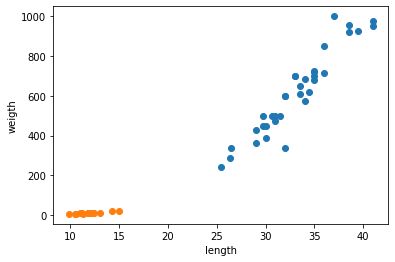

In [23]:
# - 도미, 빙어 같이 산점도 표현
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()



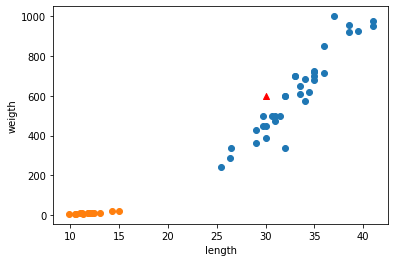

In [24]:
# - 도미, 빙어 같이 산점도 표현
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

# 새로운 생선이 나타남
plt.scatter(30, 600, marker='^', c='red')

plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [25]:
### 새로운 데이터 예측하기 : predict() 함수 사용
# predict() 함수에 사용되는 값은 새로운 독립변수의 값을 사용
# - 사용되는 값은 1개
# - 사용된 값에 대한 예측값(정답)을 알려 줍니다.
kn.predict([[30, 600]])

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [26]:
### KNN 알고리즘을 위해서는, 데이터만 잘 준비해서 저장해 두면 끝
# 틀래스(모델) 내부의 멤버 변수에 전체 데이터가 저장되어 있습니다.
# - 전체데이터 = 독립변수, 종속변수 각각 변수에 저장
# - 예측 할 독립변수를 넣어주면, 모델이 가지고 있는 전체 데이터에서
# 가장 가까운 거리의 데이터가 속한 종속변수의 값을 알려주는 방식

# (단점) 데이터 많은 경우 CPU, RAM 사양이 좋아야함

In [27]:
# 모델 안에 훈련데이터 있는지 확인
# 클래스 내부에 _fit_X 라는 멤버 변수가 있습니다.

# 모델이 가지고 있는 훈련데이터
kn._fit_X

# 모델이 가지고 있는 정답데이터
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [28]:
### 최근접 이웃은 몇개를 기준으로?
# 기본값은 5
# 예측을 위해 사용된 데이터의 근거리 5개를 기준으로 기본적으로 가장 가까운
# 직선거리의 데이터가 속한 종속변수의 값을 알려줍니다.
# n_neighbors = 5 라고 정의 합니다.
# 클래스(모델) 생성시에 기준갯수를 지정합니다
# 지정된 갯수를 이용해 훈련을 하고, 예측합니다

In [16]:
### 이웃의 갯수 20개를 기준갯수로 정한 후 훈련 및 예측해보기
kn20 = KNeighborsClassifier(n_neighbors = 20)
kn20

KNeighborsClassifier(n_neighbors=20)

In [17]:
kn20.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=20)

In [31]:
kn20.score(fish_data, fish_target)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9795918367346939

In [32]:
kn49 = KNeighborsClassifier(n_neighbors = 49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7142857142857143

In [ ]:
# [문제]
# 가장 적합한 n_neighbors 갯수 찾기
# 1보다 작아지기 전까지의 갯수의 값을 찾아라

# kn49 = KNeighborsClassifier(n_neighbors = 49)
# kn49.fit(fish_data, fish_target)
# kn49.score(fish_data, fish_target)

list = []
for i in range(1,len(fish_target)):
    kn0 = KNeighborsClassifier(n_neighbors = i)
    kn0.fit(fish_data, fish_target)
    a = kn0.score(fish_data, fish_target)
    list.append(a)
    
list  

In [34]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

nCnt = 0
for n in range(1, len(fish_data)):
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)
    if score < 1 :
        nCnt = n - 1
        print("nCnt =", nCnt)
        break

nCnt = 17


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

In [35]:
kn = KNeighborsClassifier(n_neighbors = nCnt)
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0